In [ ]:
#Youssif Hisham Mahmoud Abdallah 
#GRIPSEP22
#Task Number 1 - Superstore Dataset EDA
#You can find a run down to the code here, and in the github link you can find the Conclusion and Analysis Text File with analysis and thoughts
#mostly used Python for data cleaning, and used Seaborn mainly for visualization 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from tkinter.tix import COLUMN
from turtle import color



In [4]:
data = pd.read_csv('SampleSuperstore.csv', encoding='cp1252')
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [5]:
#Checking for Any Null Values 
data.info()
#There is no NaNs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Checking for any duplicates, Deleted Duplicates using Excel 
no_of_duplicates = data.duplicated().sum()


In [7]:
#Deleting unnecessary Columns
#Looking at the data Country column is useless because its single valued "United States"
data = data.drop(['Country', 'Postal Code'], axis=1)

In [8]:
data.describe()
#The Profit of the median is 8.6 which is not normal
#Average of the sales of all stores are 229.8$
#Average discounts value are 0.15% 
#Profit Average of all stores are 28.6$ 
#Maximum Discount made of all stores is 0.8% OFF

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data 

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

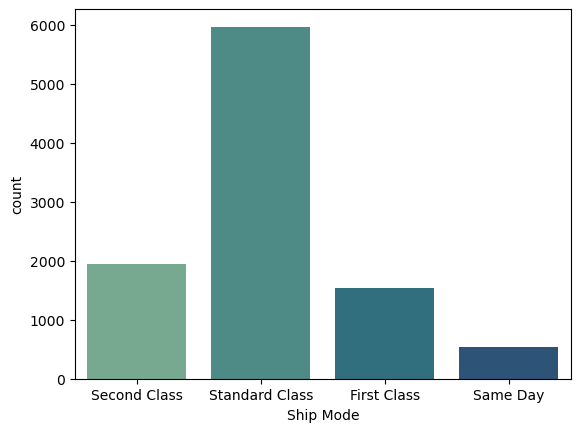

In [10]:
#Shipment Type Mode
sns.countplot(x=data['Ship Mode'], palette='crest')

<AxesSubplot:xlabel='Segment', ylabel='count'>

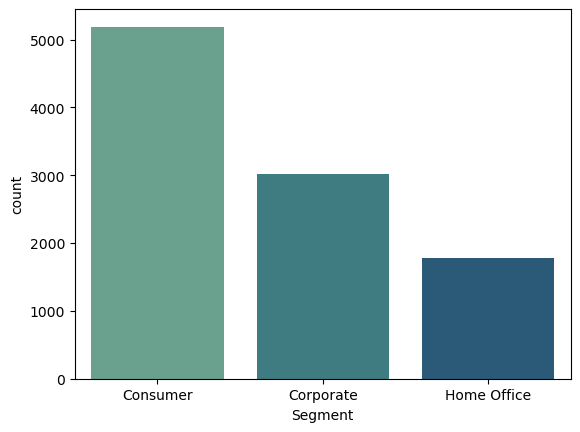

In [11]:
#Customer Segment Count 
#The Highest ordering customers is the direct Consumers
sns.countplot(x=data['Segment'], palette='crest')

<AxesSubplot:title={'center':'Most Ordered Category'}>

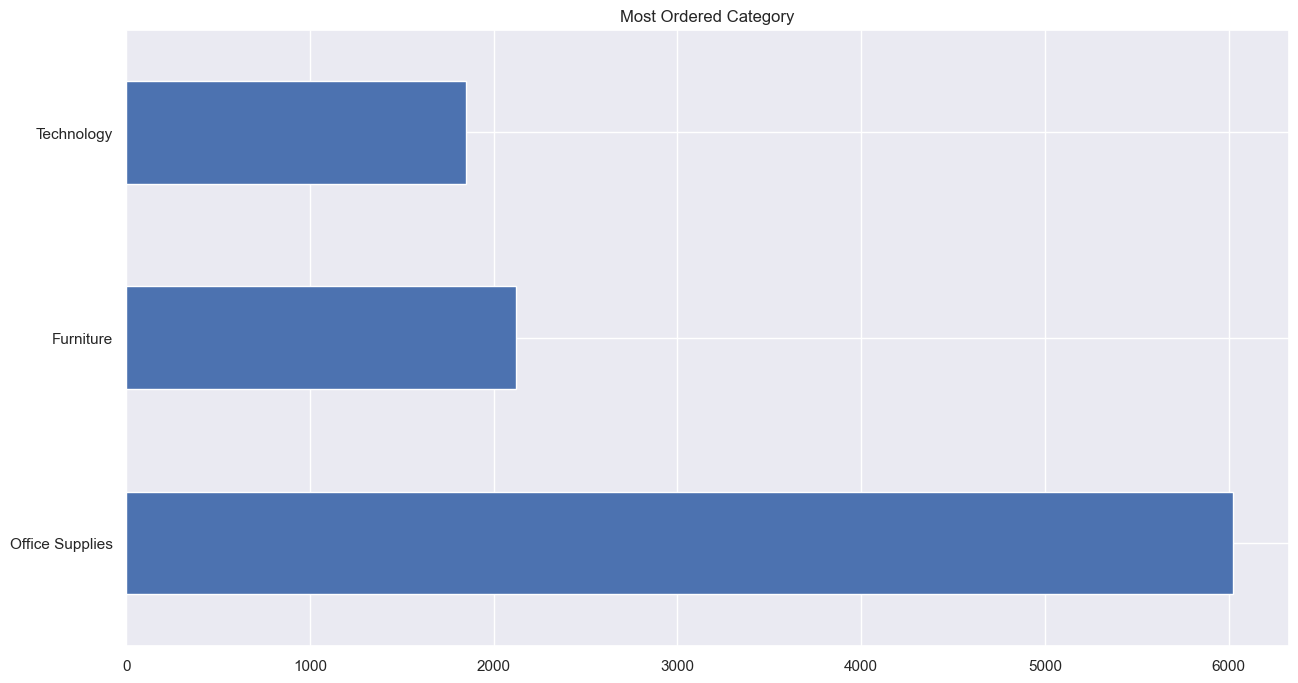

In [30]:
#Most popular Category In the superstore
#The most popular Category is Office Supplies 
sns.set(rc = {'figure.figsize':(15,8)})

data['Category'].value_counts().plot(kind='barh', title='Most Ordered Category')

<AxesSubplot:title={'center':'Category Sales'}, ylabel='Category'>

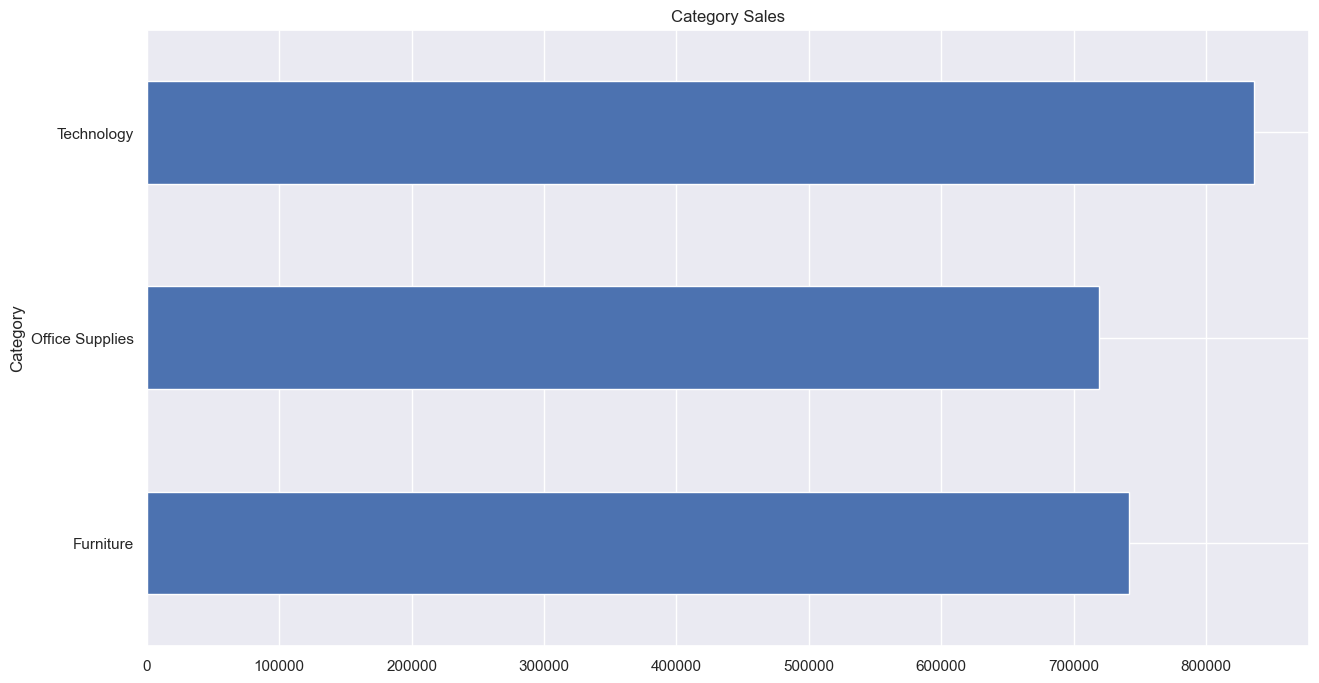

In [13]:
#Profit Per Category
#Surprisingly The Most profits come from The Technology Category
#While it's the least ordered/popular Category
data.groupby('Category')['Sales'].sum().plot(kind='barh', title='Category Sales')

<AxesSubplot:title={'center':'Quantity Sold Per Category'}, ylabel='Category'>

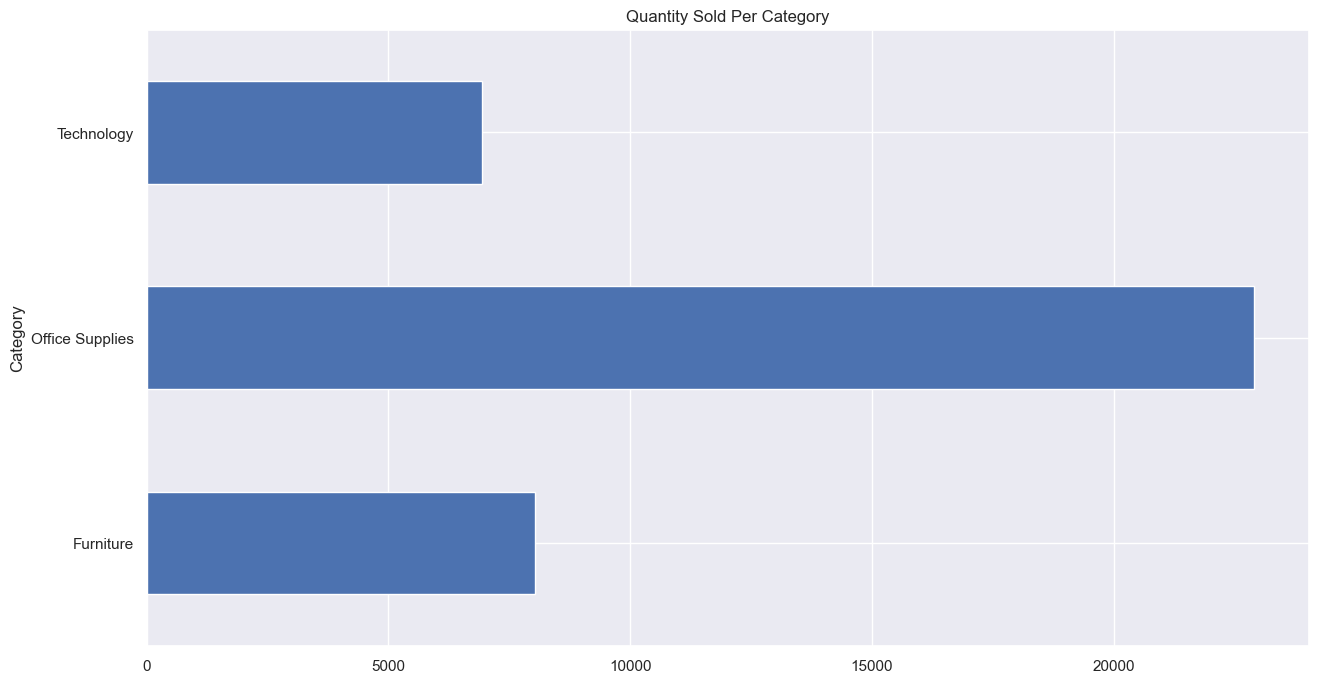

In [14]:
#Quantities Sold per Category
#As we can see, Office Supplies quantities are the most sold but not the most Profitable
data.groupby('Category')['Quantity'].sum().plot(kind='barh',title='Quantity Sold Per Category')


<AxesSubplot:title={'center':'Quantity that has been sold'}, ylabel='Region,Category'>

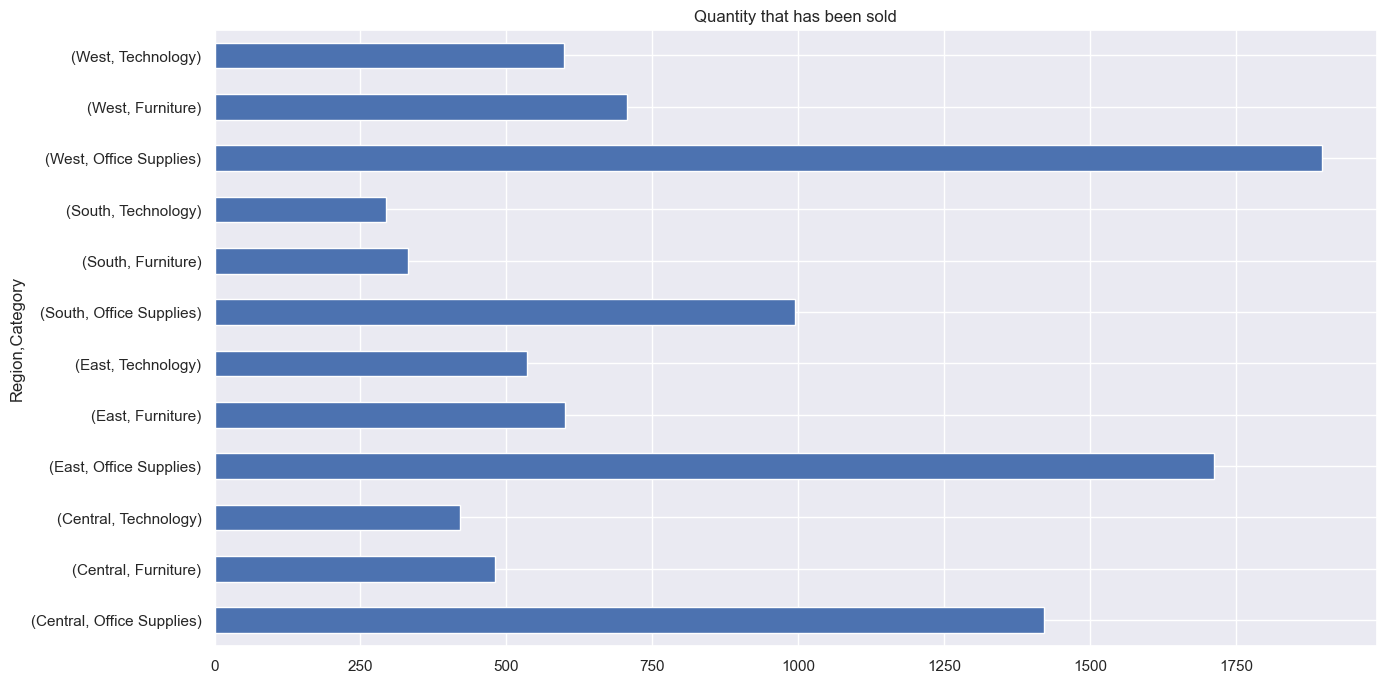

In [15]:
#Now Looking at the mose selling Categories by region
#According to each region a satet has products to be sold in
data.groupby('Region')['Category'].value_counts().plot(kind='barh',title='Quantity that has been sold')


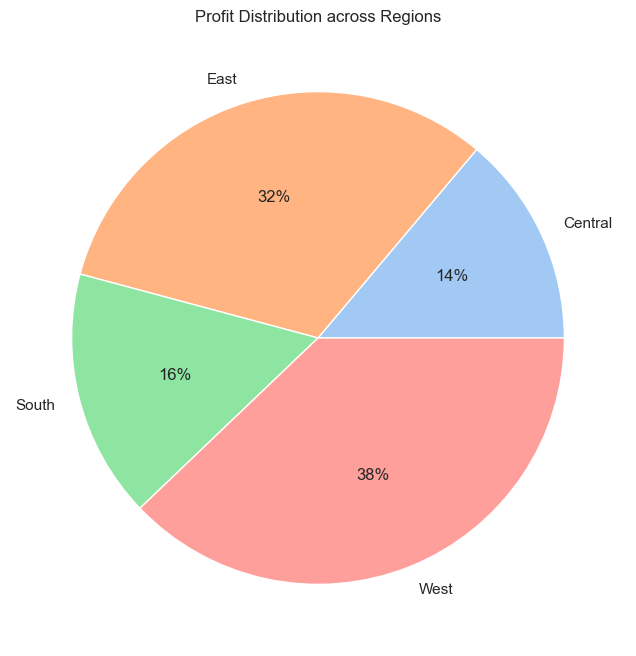

In [16]:
#Continuing the Regions Analysis 
#The Profits per region
#The most proftable region is the WEST
labels = data.groupby('Region')['Profit'].sum().index
values = data.groupby('Region')['Profit'].sum().values
colors = sns.color_palette('pastel')[0:4]

plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Profit Distribution across Regions")
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='State'>

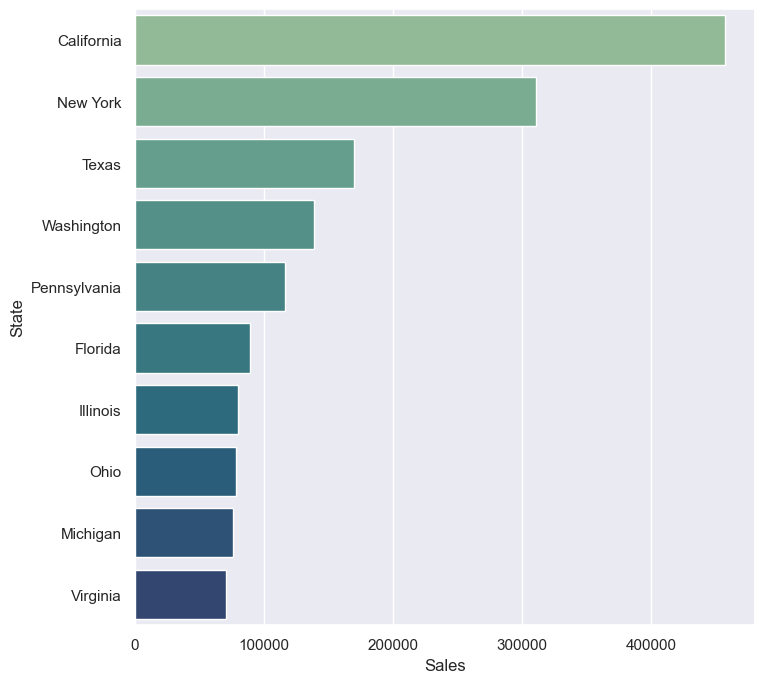

In [33]:
#total Revenues per states 
#Grouping the data of states and sorting by sales
sales_by_state = data.groupby("State", as_index=False).sum().sort_values(by="Sales", ascending=False)

#Profits Per State
sales_by_state["Proft_margin"] = sales_by_state["Profit"] / sales_by_state["Sales"]

fig, ax = plt.subplots(figsize=(8,8))

#Sales per state
sns.barplot(x=sales_by_state["Sales"][:20], y=sales_by_state["State"][:10], ax=ax, palette="crest")


In [28]:
#Lets See the Highest profits of categories in the cities
def city_prof(category):
    category_1 = data[data['Category']==category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:10].plot(kind='bar', title='10 Cities Profits According to Category: {}'.format(category))

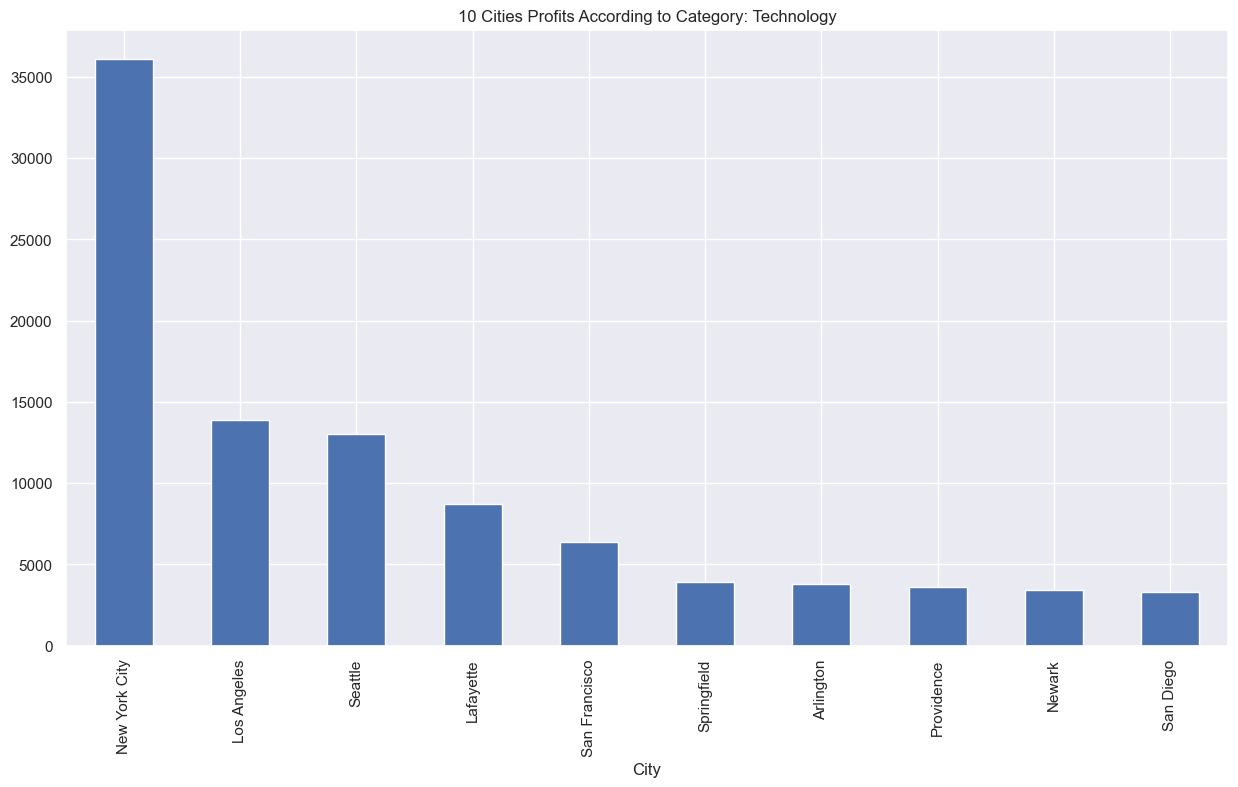

In [19]:
#Most profited citties according to Category Technology
city_prof('Technology')

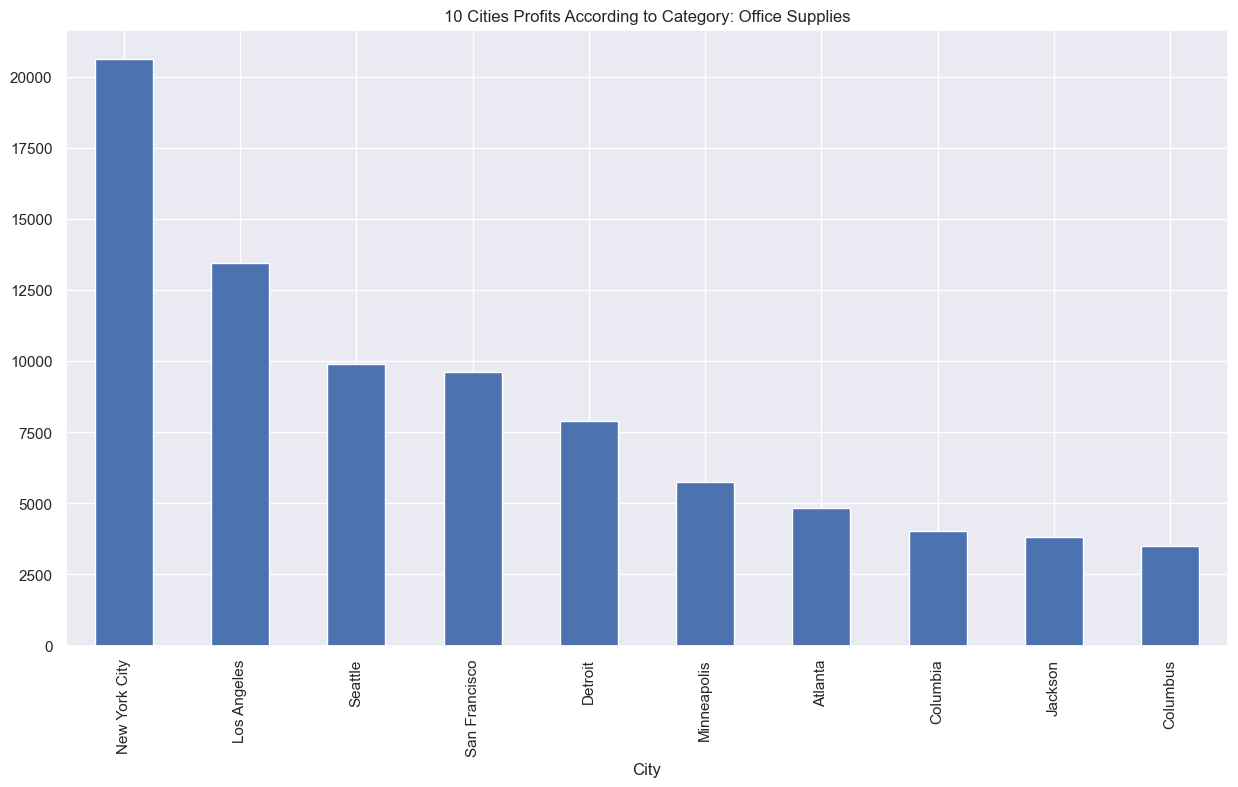

In [20]:
#Most profited citties according to Category Office Supplies
city_prof('Office Supplies')

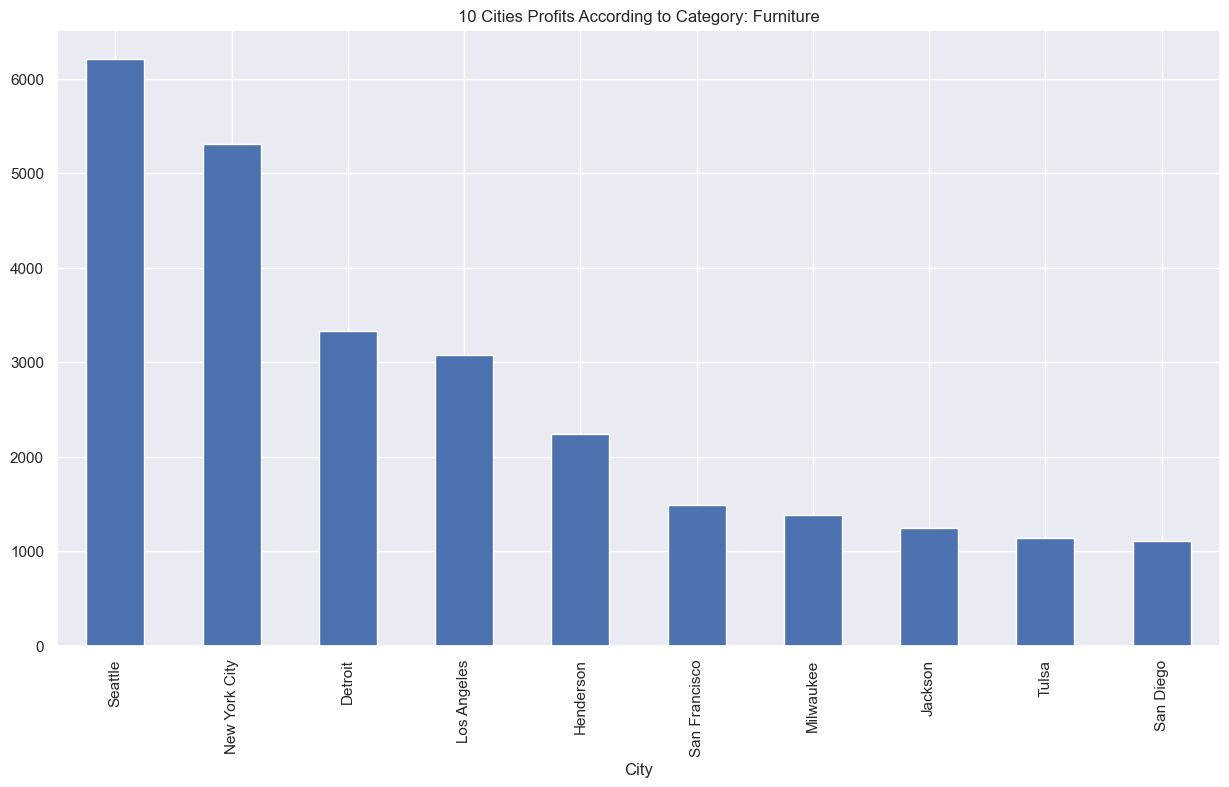

In [21]:
#Most profited citties according to Category Furniture
city_prof('Furniture')


Text(0.5, 1.0, 'Sub-Categories')

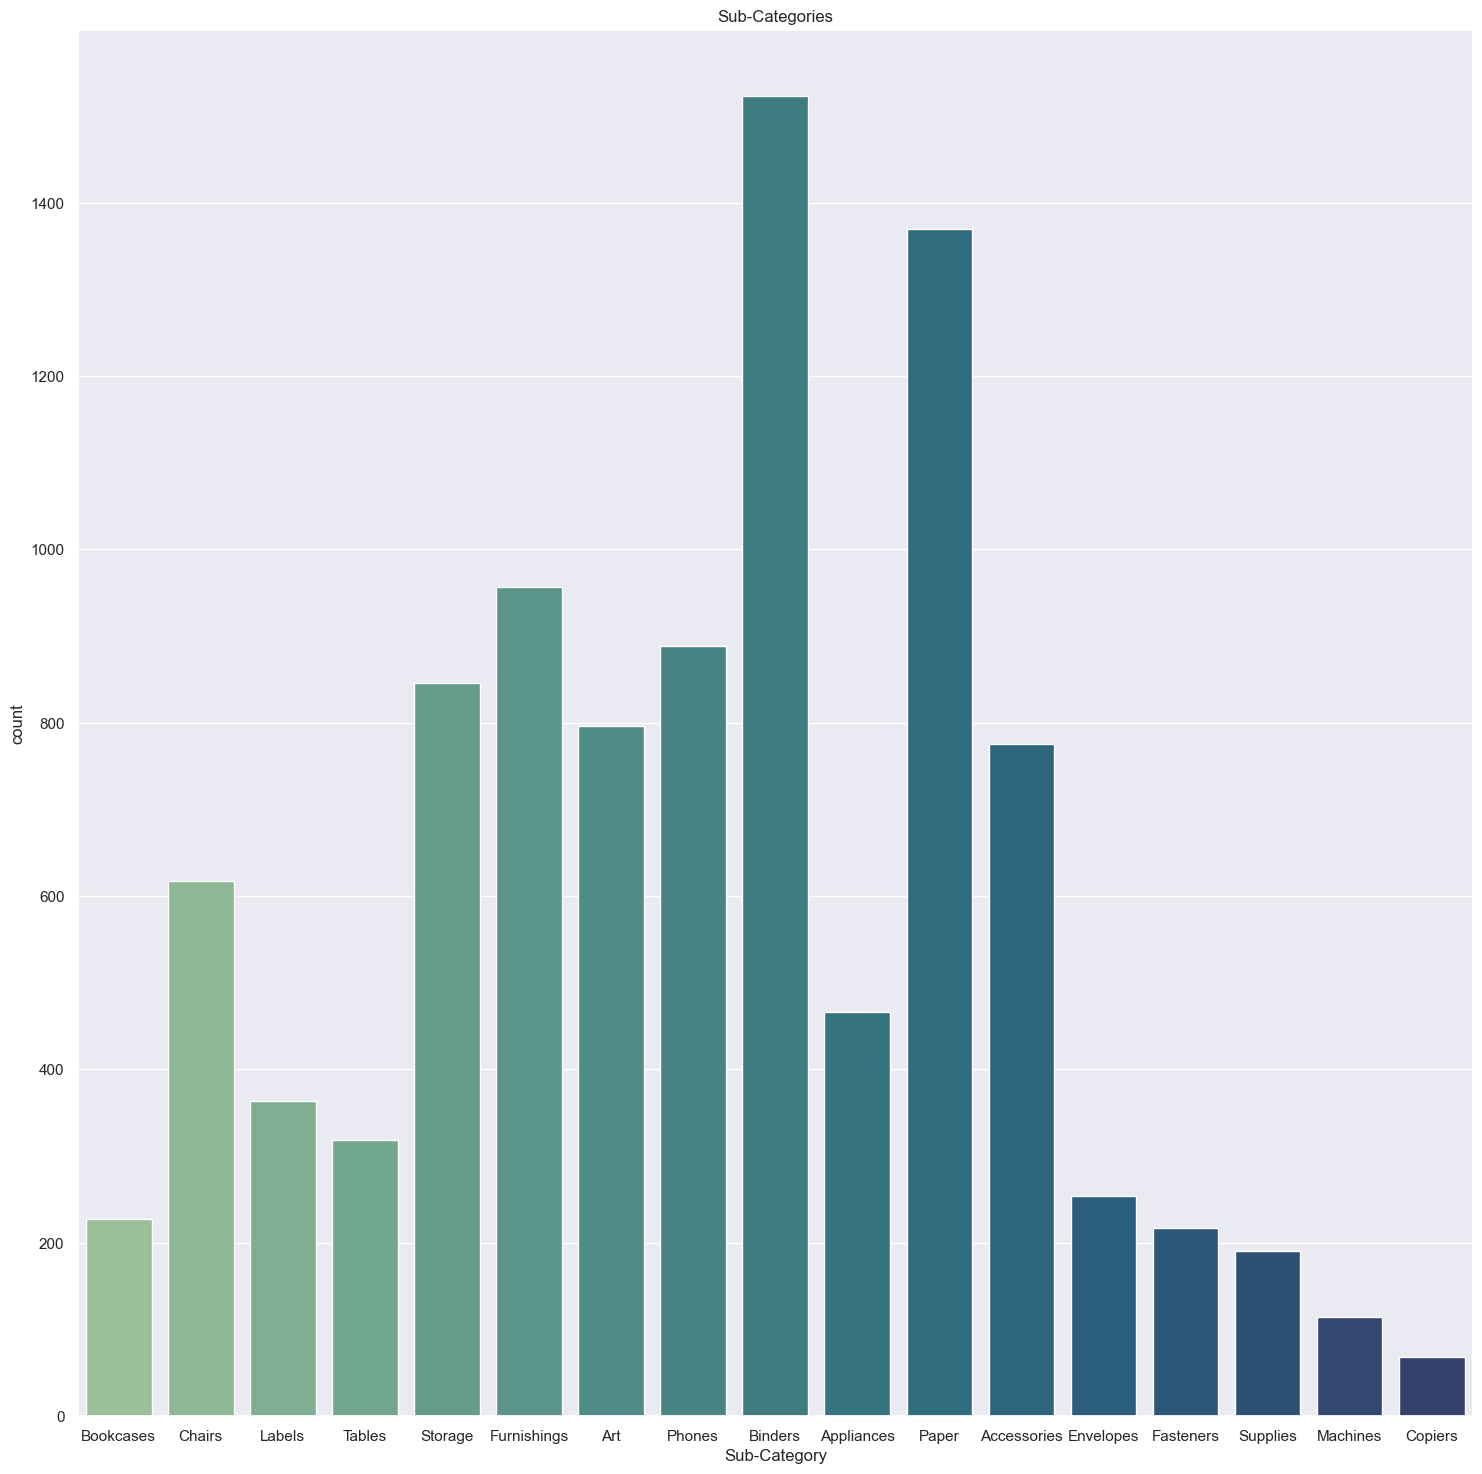

In [22]:
plt.figure(figsize=(18,18))
sns.countplot(x=data['Sub-Category'], palette='crest')
plt.title('Sub-Categories')